# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression

# Import data

In [2]:
df_sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Analyze data

## Describe

In [3]:
df_sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Info

In [4]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df_sleep.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


## Correlation

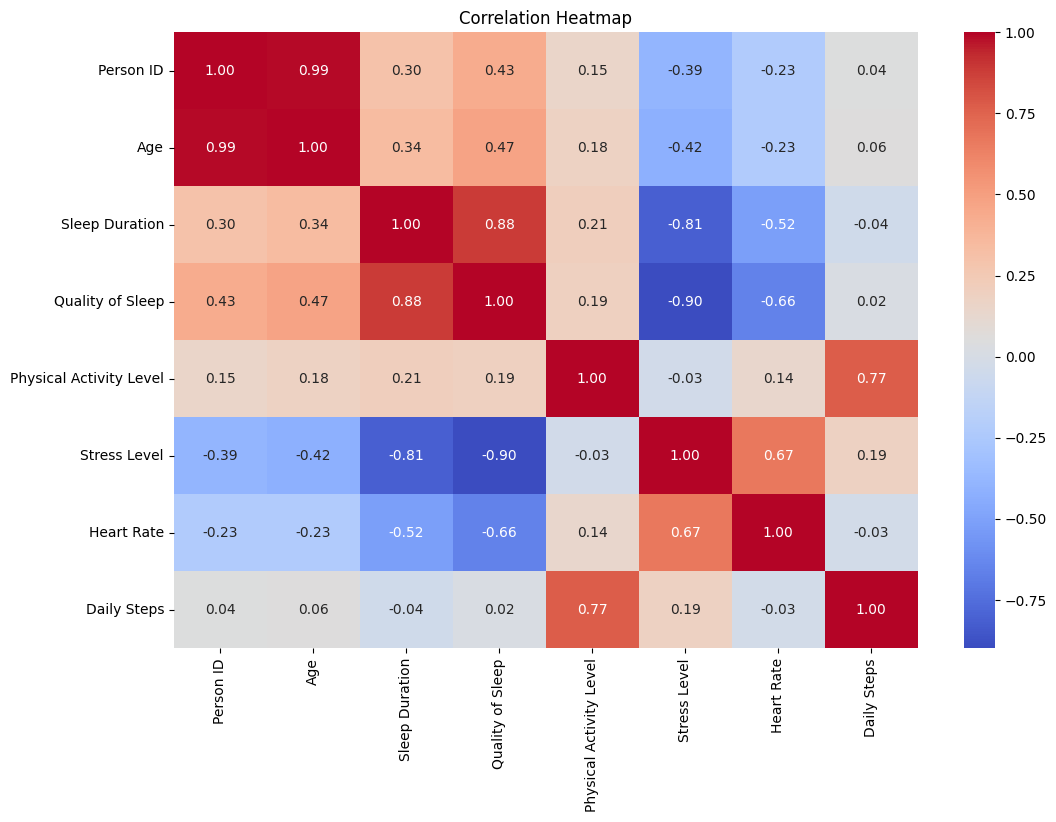

In [6]:
numeric_cols = df_sleep.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_sleep[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Prepare data for Multiple Linear Regression

In [7]:
X = df_sleep[['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
y = df_sleep['Sleep Duration']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (299, 5)
X_test shape: (75, 5)
y_train shape: (299,)
y_test shape: (75,)


# Train the Multiple Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.50553764e-03  1.23518687e-02 -3.24365658e-01 -1.38600698e-02
 -7.87093417e-05]
Intercept: 9.75556465749019


In [12]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df

,Feature,Coefficient
0,Age,-0.002506
1,Physical Activity Level,0.012352
2,Stress Level,-0.324366
3,Heart Rate,-0.013860
4,Daily Steps,-0.000079


# Make Predictions

In [13]:
y_pred = model.predict(X_test)

In [14]:
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results_df.head(10)

,Actual,Predicted
0,8.5,7.725779
1,6.1,6.062052
2,6.0,5.858655
3,8.5,7.725779
4,6.0,6.059547
5,6.4,6.460414
6,6.0,6.057041
7,7.2,7.613059
8,8.4,7.723273
9,7.3,7.207479


# Evaluate the Model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Squared Error: 0.1691394433113125
Root Mean Squared Error: 0.41126566026269745
Mean Absolute Error: 0.2929234769954171
R-squared Score: 0.7459493910145547


# Visualize Results

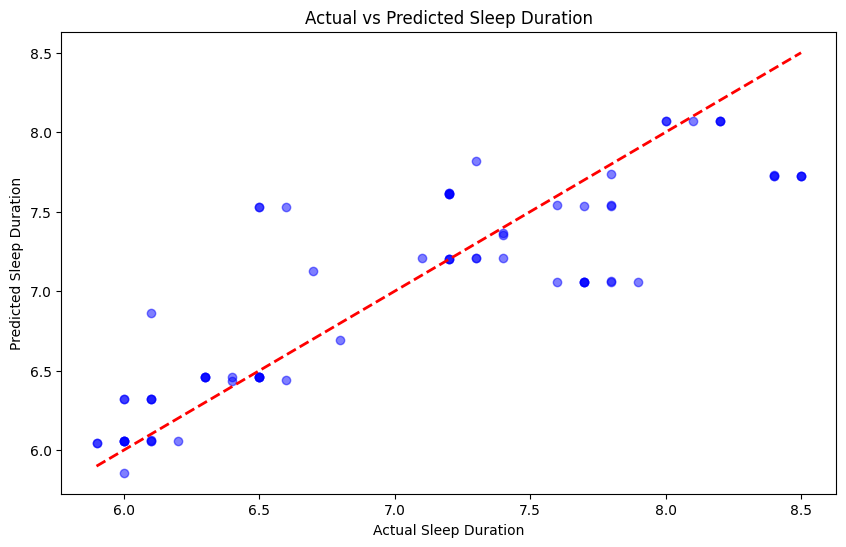

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sleep Duration')
plt.ylabel('Predicted Sleep Duration')
plt.title('Actual vs Predicted Sleep Duration')
plt.show()

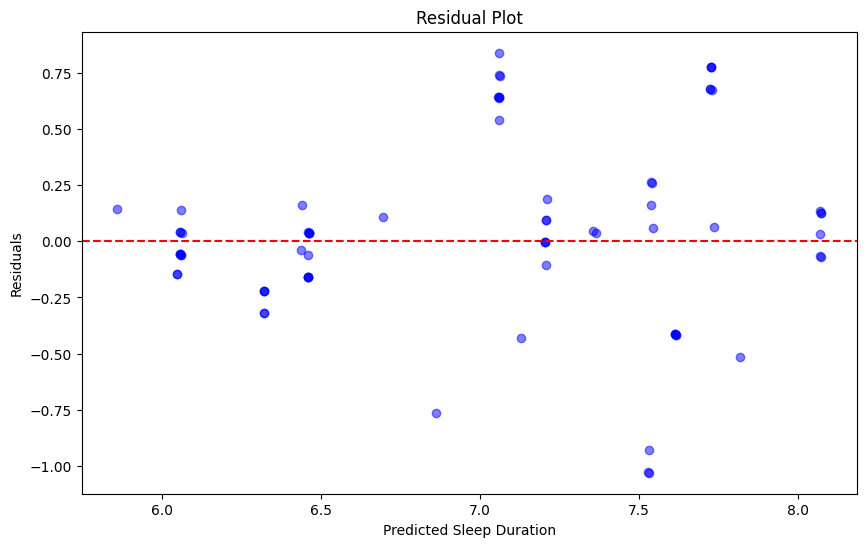

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sleep Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

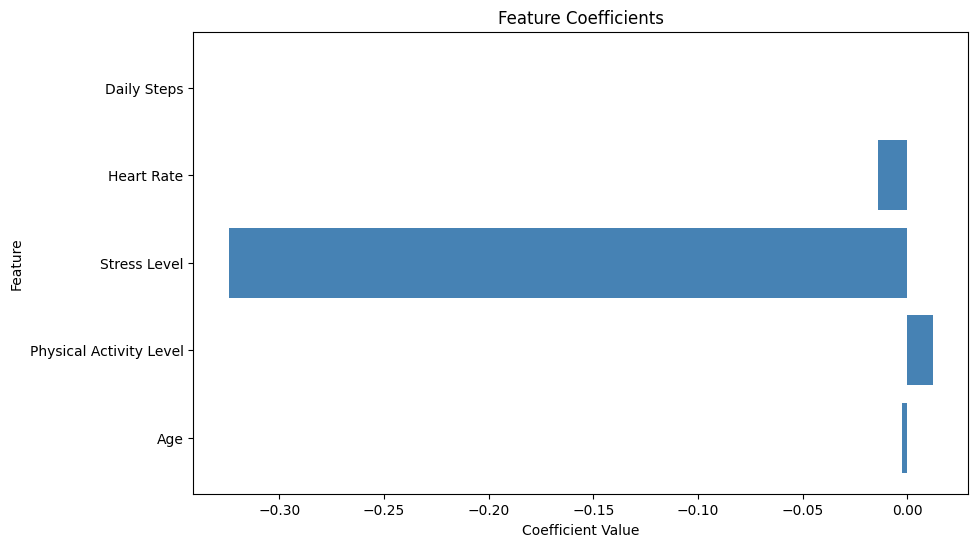

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

# Predict Sleep Duration for new data

In [20]:
new_data = pd.DataFrame([[35, 60, 5, 70, 7000]], columns=X.columns)
predicted_sleep = model.predict(new_data)
print(f'Predicted Sleep Duration: {predicted_sleep[0]:.2f} hours')
print(f'For: Age=35, Physical Activity=60, Stress Level=5, Heart Rate=70, Daily Steps=7000')

Predicted Sleep Duration: 7.27 hours
For: Age=35, Physical Activity=60, Stress Level=5, Heart Rate=70, Daily Steps=7000
